In [162]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

In [163]:
df = pd.read_csv('D:/Загрузки/data_train.csv', index_col ='Unnamed: 0' )
df.head(10)

,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег,Цена
0,audi,a8,2000,3328.0,166.0,дизель,авто,5.0,4.0,352640.00,101800
1,nissan,juke,2013,NaN,81.0,дизель,ручной,NaN,4.0,63460.00,250200
2,skoda,fabia,2014,1199.0,55.0,NaN,ручной,5.0,5.0,15865.00,201700
3,audi,a3,2013,1968.0,110.0,NaN,ручной,NaN,4.0,44606.30,491300
4,bmw,NaN,1999,2793.0,142.0,бензин,ручной,5.0,4.0,187150.00,56100
5,ford,c-max,2015,998.0,92.0,NaN,ручной,5.0,5.0,14487.50,292900
6,audi,a1,2012,1390.0,136.0,NaN,авто,4.0,2.0,23940.00,275100
7,skoda,octavia,2014,NaN,162.0,NaN,авто,NaN,NaN,28500.00,440500
8,seat,alhambra,2014,1968.0,103.0,дизель,ручной,5.0,4.0,27366.65,405800
9,bmw,NaN,2005,2171.0,125.0,бензин,ручной,5.0,4.0,179075.00,120600


In [164]:
df.describe()

,Год выпуска,Рабочий объем,Мощность двигателя,Количество мест,Количество дверей,Пробег,Цена
count,146012.000000,133953.000000,146012.000000,122633.000000,135322.000000,146012.000000,1.460120e+05
mean,2008.726824,1900.935754,101.656179,4.861660,3.983846,87033.925524,2.617951e+05
std,25.998616,985.233202,50.264525,0.865884,0.961134,75049.601767,5.513408e+05
min,0.000000,15.000000,10.000000,1.000000,1.000000,0.000000,3.200000e+03
25%,2006.000000,1400.000000,70.000000,5.000000,4.000000,21280.000000,9.580000e+04
50%,2011.000000,1798.000000,90.000000,5.000000,4.000000,75525.000000,1.975000e+05
75%,2014.000000,1998.000000,120.000000,5.000000,5.000000,134900.000000,3.357000e+05
max,2016.000000,32000.000000,766.000000,23.000000,54.000000,853100.000000,1.293750e+08


Разбираемся с данными

In [165]:
a = df['Марка'].unique()
a

array(['audi', 'nissan', 'skoda', 'bmw', 'ford', 'seat', 'dodge',
       'mitsubishi', 'fiat', 'mercedes-benz', 'opel', 'volkswagen',
       'chevrolet', 'porsche', 'mini', 'jaguar', 'citroen', 'hyundai',
       'toyota', 'smart', 'honda', 'peugeot', 'suzuki', 'kia', 'mazda',
       'volvo', 'renault', 'lancia', 'rover', 'jeep', 'lexus', 'maserati',
       'chrysler', 'alfa-romeo', 'hummer', 'subaru', 'isuzu',
       'lamborghini', 'bentley', 'infinity', 'tesla', 'lotus'],
      dtype=object)

In [166]:
df['Марка_aston-martin'] = 0

In [167]:
df['Количество мест'].value_counts()

5.0     95076
4.0     14898
7.0      5108
2.0      4350
3.0      1589
6.0       732
9.0       575
8.0       291
1.0         7
17.0        2
10.0        2
23.0        1
12.0        1
14.0        1
Name: Количество мест, dtype: int64

In [168]:
df['Тип топлива'].value_counts()

дизель    28126
бензин    27634
Name: Тип топлива, dtype: int64

In [169]:
df['Количество дверей'].value_counts()

4.0     68018
5.0     41629
2.0     18350
3.0      7266
6.0        55
1.0         3
54.0        1
Name: Количество дверей, dtype: int64

In [170]:
df['Год выпуска'].value_counts()

2015    26045
2012    13694
2011    11729
2014    11210
2013     8940
2010     8070
2009     7106
2008     7080
2007     7013
2006     6422
2016     5995
2005     5563
2004     4765
2003     4016
2002     3619
2001     3203
2000     2662
1999     2370
1998     1661
1997     1091
1996      804
1995      507
1994      376
1993      262
1992      244
1991      223
1990      139
1989       92
1988       92
1987       75
        ...  
831         1
1086        1
1853        1
1213        1
573         1
316         1
127         1
1590        1
59          1
1463        1
1473        1
1222        1
36          1
45          1
1850        1
988         1
934         1
1062        1
1318        1
1240        1
40          1
1320        1
1748        1
1450        1
1870        1
43          1
1355        1
1324        1
1480        1
0           1
Name: Год выпуска, Length: 172, dtype: int64

In [171]:
df = df.loc[df['Год выпуска'] > 1963]

In [172]:
df['Год выпуска'].value_counts()

2015    26045
2012    13694
2011    11729
2014    11210
2013     8940
2010     8070
2009     7106
2008     7080
2007     7013
2006     6422
2016     5995
2005     5563
2004     4765
2003     4016
2002     3619
2001     3203
2000     2662
1999     2370
1998     1661
1997     1091
1996      804
1995      507
1994      376
1993      262
1992      244
1991      223
1990      139
1989       92
1988       92
1987       75
1983       55
1986       54
1984       51
1985       45
1979       37
1980       36
1982       35
1965       32
1973       32
1968       29
1970       29
1966       28
1972       28
1971       27
1974       24
1967       23
1977       22
1964       21
1978       21
1981       21
1969       15
1976       14
1975       11
Name: Год выпуска, dtype: int64

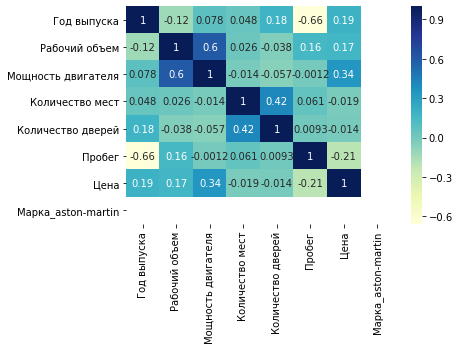

In [173]:
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [174]:
z = pd.DataFrame(df.groupby('Марка').mean()['Цена'])
z


,Цена
Марка,
alfa-romeo,1.240040e+05
audi,3.687315e+05
bentley,1.731789e+06
bmw,3.459575e+05
chevrolet,1.583443e+05
chrysler,4.885214e+05
citroen,1.590633e+05
dodge,3.476928e+05
fiat,1.536607e+05


In [175]:
df = df.drop('Модель', axis =1) #пока не знаю как модель преобразовать модель, если делать pd.get_dummies места не хватит

In [176]:
#преобразуем категориальные фичи в числа(1 - если это та марка, которая указана в строке, 0 - иначе) и 
#заполняем пропуски средним
df = pd.get_dummies(df)
df = df.fillna(df.mean())
df.head()


,Год выпуска,Рабочий объем,Мощность двигателя,Количество мест,Количество дверей,Пробег,Цена,Марка_aston-martin,Марка_alfa-romeo,Марка_audi,...,Марка_subaru,Марка_suzuki,Марка_tesla,Марка_toyota,Марка_volkswagen,Марка_volvo,Тип топлива_бензин,Тип топлива_дизель,Трансмиссия_авто,Трансмиссия_ручной
0,2000,3328.000000,166.0,5.000000,4.0,352640.0,101800,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,2013,1898.612597,81.0,4.862148,4.0,63460.0,250200,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2014,1199.000000,55.0,5.000000,5.0,15865.0,201700,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2013,1968.000000,110.0,4.862148,4.0,44606.3,491300,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1999,2793.000000,142.0,5.000000,4.0,187150.0,56100,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [177]:
#Убираем цену из датафрефма и записываем в y

y = df['Цена']
X = df.drop('Цена', axis =1)
X.head()



,Год выпуска,Рабочий объем,Мощность двигателя,Количество мест,Количество дверей,Пробег,Марка_aston-martin,Марка_alfa-romeo,Марка_audi,Марка_bentley,...,Марка_subaru,Марка_suzuki,Марка_tesla,Марка_toyota,Марка_volkswagen,Марка_volvo,Тип топлива_бензин,Тип топлива_дизель,Трансмиссия_авто,Трансмиссия_ручной
0,2000,3328.000000,166.0,5.000000,4.0,352640.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2013,1898.612597,81.0,4.862148,4.0,63460.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2014,1199.000000,55.0,5.000000,5.0,15865.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2013,1968.000000,110.0,4.862148,4.0,44606.3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1999,2793.000000,142.0,5.000000,4.0,187150.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [199]:
from sklearn.ensemble import RandomForestClassifier 
#я пыталась, но памяти не хватило

In [200]:
car = RandomForestClassifier()
car.fit(train_X, train_y)
y_pred = car.predict(test_X)
t = r2_score(test_y, y_pred)
t

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MemoryError: could not allocate 567934976 bytes

In [179]:
train_X, test_X, train_y, test_y = train_test_split(X, y)
car = DecisionTreeRegressor()
#делаем дерево

In [180]:
#читим с GridSearchCV (подбирает наилучшие параметры, глубина, количество листьев), нужно подождать..
#сразу обучаем и смотрим score
params = {'min_samples_split' :[i for i in range(20, 160, 20)],'min_samples_leaf' :[i for i in range(5, 30 , 5)]}

car_best = GridSearchCV(car, params, cv=10, scoring='r2', n_jobs=-1)
car_best.fit(train_X, train_y)
y_pred = car_best.predict(test_X)
t = r2_score(test_y, y_pred)
t


0.6496801093128419

In [181]:
#смотрим лучшие парметры
print(car_best.best_params_)

{'min_samples_leaf': 15, 'min_samples_split': 140}


In [195]:
#создаем дерево с наилучшими параметрами и по скору смотрим, чтобы он совпал с предыдущим
car = DecisionTreeRegressor(min_samples_leaf = 15, min_samples_split = 140)
car.fit(train_X, train_y)
y_pred = car.predict(test_X)
t = r2_score(test_y, y_pred)
t


0.6496782924399043

In [196]:
#car = LinearRegression()
#car.fit(train_X, train_y)
#y_pred = home.predict(test_X)
#t = r2_score(test_y, y_pred)
#t
#если вдруг захочется лин регресии

0.6019416579099143

In [184]:
#car = RidgeCV(cv = 10 )
#car.fit(train_X, train_y)
#y_pred = car.predict(test_X)
#t = r2_score(test_y, y_pred)
#t
#или Ridge

0.5977708475236142

## Работа с тестовыми данными

In [186]:
c = pd.read_csv('D:/Загрузки/data_test.csv')
Id = c['Unnamed: 0'] #эта колонка нужна для предсказний 
c.drop('Модель', axis = 1)
c.head()



,Unnamed: 0,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег
0,146012,opel,astra,1999,1796.0,85.0,бензин,ручной,5.0,4.0,191900.00
1,146013,bmw,NaN,1979,3188.0,147.0,бензин,ручной,4.0,2.0,67071.90
2,146014,peugeot,307,2006,1587.0,80.0,NaN,авто,5.0,5.0,162450.00
3,146015,opel,corsa,2015,1398.0,66.0,NaN,ручной,5.0,5.0,27721.95
4,146016,skoda,octavia,2015,1798.0,10.0,бензин,ручной,5.0,NaN,9.50


In [187]:
c = pd.read_csv('D:/Загрузки/data_test.csv', index_col = 'Unnamed: 0')
c.head()

,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег
146012,opel,astra,1999,1796.0,85.0,бензин,ручной,5.0,4.0,191900.00
146013,bmw,NaN,1979,3188.0,147.0,бензин,ручной,4.0,2.0,67071.90
146014,peugeot,307,2006,1587.0,80.0,NaN,авто,5.0,5.0,162450.00
146015,opel,corsa,2015,1398.0,66.0,NaN,ручной,5.0,5.0,27721.95
146016,skoda,octavia,2015,1798.0,10.0,бензин,ручной,5.0,NaN,9.50


In [189]:
def change_values(val):
    
    """ для годов меньше 1950 поменяем на среднее значение года"""
    
    
    if val <1950:
        return c['Год выпуска'].mean()
    else:
        return val


In [190]:
c['Год выпуска'] = c['Год выпуска'].apply(change_values)

In [191]:
c = c.drop('Модель', axis =1)
c= pd.get_dummies(c)
c = c.fillna(c.mean())
c.head()

,Год выпуска,Рабочий объем,Мощность двигателя,Количество мест,Количество дверей,Пробег,Марка_alfa-romeo,Марка_aston-martin,Марка_audi,Марка_bentley,...,Марка_subaru,Марка_suzuki,Марка_tesla,Марка_toyota,Марка_volkswagen,Марка_volvo,Тип топлива_бензин,Тип топлива_дизель,Трансмиссия_авто,Трансмиссия_ручной
146012,1999.0,1796.0,85.0,5.0,4.000000,191900.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
146013,1979.0,3188.0,147.0,4.0,2.000000,67071.90,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
146014,2006.0,1587.0,80.0,5.0,5.000000,162450.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146015,2015.0,1398.0,66.0,5.0,5.000000,27721.95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146016,2015.0,1798.0,10.0,5.0,3.983953,9.50,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [197]:
t = home.predict(c)
t = abs(pd.Series(t))


Id = pd.DataFrame(Id)
Id['Price'] = t
#сохраняю в папку загрузки, надо будет поменять колонку в файле, там всесто id написано Unnamed: 0
Id.to_csv('D:/Загрузки/sub.csv', index=False, encoding = 'utf-8')